# Volatility (Using Eikon Dataset)

Price vs Volatility


[Market Filter Dev Slide](https://docs.google.com/presentation/d/1OOsW0BRcUBuA6kPg_gjk7CH36ArFlg7-ZY-3GGm6Sh0/edit#slide=id.g543289dded_0_2)

Also see 2.0 Feature Engineering/Volatility.ipynb  

Volatility calcualtion follow this definition: https://www.investopedia.com/terms/v/volatility.asp

Scale price time-series with MinMaxScaler before calculate volatility.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html  

Start with Price table.  
Use lookup-symbol.csv to map column header to ticker symbol.  
Develop custom window function for volatility calculation.  
Computing volatility during analysis period.  
Extract cross-section data during target date.  
Report grouping of stock by volatility.  

In [1]:
import os, sys
import xlrd
import pandas as pd
import numpy as np
from datetime import datetime
import talib
from talib.abstract import *
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("/home/jovyan/eikon-data")
# os.listdir() # Check data directory

lookup = pd.read_csv("""lookup-stock.csv""") # For lookup (ISIN, RIC, name, symbol)
# lookup


fname = 'SET_Price_2014-2020.xlsm'
wb = xlrd.open_workbook(fname)
wb.sheet_names()

['REQUEST_TABLE',
 'Price2020',
 'Price2019',
 'Price2018',
 'Price2017',
 'Price2016',
 'Price2015',
 'Price2014']

# Time Series for Each Stock

Process daily turnover data of each stock.

Stack worksheet together.

In [2]:
series = {}

for i in range(2,8): # Note the sheet index 2014-2019 1-7
    s = wb.sheets()[i]

    # Date index
    s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
    s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))
    
    for j in range(1, s.ncols):
        c = s.col(j)
        print("{}".format(c[3].value))
        name = c[3].value # Company name (Eikon name)
        # Convert to Ticker symbol
        try:
            name = lookup.loc[lookup['name']==name].symbol.values[0]
        except Exception as e:
            print("Lookup ticker for %s faile: %s" % (name, str(e)))
        # df = pd.DataFrame()
        if not "#ERROR" in name:
            # Convert spreadsheet market cap value to python
            s2 = pd.Series(c[4:]) # observation starts at row 4
            s2 = s2.apply(lambda x: x.value)
            df = pd.concat([s1, s2], axis=1)

            if not name in series:
                series[name] = []
            series[name].append(df)


SEVEN UTILITIES AND POWER ORS
AREEYA PROPERTY
ASIA AVIATION
AMATA B GRIMM PWPL.IFCF.
ADVANCED CONNECTION CORPORATION
ABSOLUTE CLEAN ENERGY
AUTOCORP HOLDING
ADVANCED INFO SER.
AEC SECURITIES
AE.THANA SINSAP (THAI.)
ASIA FIBER
AAPICO HITECH
AIKCHOL HOSPITAL
ASIAN INSULATORS
AIM COML.GW.FH.&. LH. REIT UNT.
AIM INDL.GW.FH.&. LH. REIT
ADVANCED INFO.TECH.
AJ PLAST
AJ ADVANCE TECHNOLOGY ORS
EKARAT ENGINEERING
ALLA
ALT TELECOM
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
AMATA VN
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
SYNERGETIC AUTO PERFORMANCE
ASEFA
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
ASSET WORLD
ALLIANZ AYUDHYA CAPITAL
BUALUANG OFFE.LH. REIT.
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
BANGKOK COMMERCIAL ASSET MANAGEMENT
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA


TRINITY FHLH.PR.FUND
THAI NIPPON RUBBER INDUSTRY
TOA PAINT THAILAND
THAI OPTICAL GROUP
THAI OIL
THAI OPP
THAI POLY ACRYLIC
TPBI
TEXTILE PRESTIGE
TPI POLENE
TPI POLENE POWER
THAI POLYCONS
THAI PACK.AND PRINT.
THAI.PRI.PR.FHLH. REIT
TQM CORPORATION
THAI RAYON
TRC CONSTRUCTION
TRITON HOLDING
THAI RUNG UNION CAR
THAI RUBBER LATEX GROUP
TRUE CORPORATION
THAI STEEL CABLE
THAI SOLAR ENERGY
THAI SETAKIJ IN.
THIENSURAT
THAI SUGAR TERMINAL
TATA STEEL (THAILAND)
THORESEN THAI AG.
TTCL
THAI TEXTILE
TALAAD THAI LEASEHOLD PROPERTY
TORAY TEXTILES
THAI TAP WATER SUPPLY
T U DOME RESD.CMX. LH. PR.
THAI UNION GROUP
THAIVIVAT INSURANCE
THAI VEGETABLE OIL
THAI WIRE PRODUCTS
THAI WAH
TWZ
TYCOONS WORLDWIDE GROUP
U CITY
UAC GLOBAL PUBLIC COMPANY LIMITED
UNION MOSAIC
UNIQUE ENGR.AND CON.
UOB KAY HIAN SECURITIES
UNION PLASTIC
UNION PIONEER FABRIC
UNITED PALM OIL IND.
URBANA PROPERTY (LEASE HOLD)
UNION TEXTILE INDUSTRIES
UNITED PAPER
UNIVENTURES
UNIVANICH PALM OIL
VAROPAKORN
VGI
VIBHAVADI MEDICAL
SRIVICHAI VEJVI

S KIJCHAI ENTERPRISE
SIKARIN
SALEE PRINTING
SAHAMIT MACHINERY
SYN MUN KONG
SAHAMITR PRESSURE CTNR.
STARS MICROELECTRONICS
SNC FORMER
S & P SYNDICATE
SOLARTRON
S KHONKAEN FOODS
S PACK & PRINT
SUPALAI
SAHA PATHANAPIBUL
SPCG
SAMUI AIRPORT PROPERTY (LEASEHOLD)
SIAM PAN GROUP
SAHA PATH.INTER-HOLDING
STAR PTL.REFN.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SAHAKOL EQUIPMENT
SRIRACHA CONSTRUCTION
SRI PANWA HOSPLTY. REIT. TST.
SERMSUK
SURAPON FOODS
SERMSANG POWER CORPORATION
SALA @ SATHORN PROPERTY
SIAM STEEL SERVICE CTR.
SUB SRI THAI
SUB SRI THAI REAL ESTATE INVESTMENT TRUST
SRI TRANG AGRO-INDUSTRY
THAI STANLEY ELECTRIC
STARK CORPORATION
SINO-THAI ENGR.CON.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
STP & I
SAHA-UNION
SUPER ENERGY CORPORATION
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SUSCO
GOLDEN LIME
SAMITIVEJ
SVI
SVOA
SYMPHONY COMMUNICATION
SYNNEX (THAILAND)


LADPRAO GENERAL HOSPITAL
LPN DEVELOPMENT
LAGUNA RESORTS & HOTELS
LAM SOON
LUXURY REAL ESTATE INVESTMENT
MAHACHAI HOSPITAL
MFC IINV.PR.&.LH.
MFC PATONG HERITAGE PROPERTY
MFC-STRATEGIC STORAGE
MK RESTAURANT GROUP
MASTER AD
MAJOR CINEPLEX GROUP
SIAM MAKRO
MALEE GROUP
MANDARIN HOTEL
MATCHING MAXIMIZE SLN.
MATICHON
MAX METAL
MBK
MAYBANK KIM ENG SECS. (THAILAND)
MC GROUP
MCOT
MCS STEEL
MDX
MEGA LIFESCIENCES
MURAMOTO ELECTRON
MFC ASSET MANAGEMENT
MFEC
MIDA ASSETS
MILLCON STEEL
MINOR INTERNATIONAL
MILLIONAIRE PROPERTY
MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOB

CITY STEEL
CH KARNCHANG
CK POWER
CHIANGMAI FRZ.FOODS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CHIANG MAI RAM MED.BUS.
CHRISTIANI & NIELSEN
COL
COM7
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CP ALL
CHAROEN POKPHAND FOODS
CASTLE PEAK HOLDINGS
CHUMPORN PALM OIL IND.
CPL GROUP
CENTRAL PATTANA
CPN COML.GW.LH.PR.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
C P TOWER GROWTH LEASEHOLD PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CHU KAI
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CROWN SEAL
CSP STEEL CENTER
CITY SPORTS & RECREATION
COMMUNICATION & SYSTEM SOLUTION
CENTARA H&R.LH.PR.
CHAROONG THAI WIRE CAB.
CHAI WATANA TANNERY
DYNASTY CERAMIC
DCON PRODUCTS
#ERROR
Lookup ticker for #ERRO

TATA STEEL (THAILAND)
THORESEN THAI AG.
TTCL
THAI TEXTILE
TALAAD THAI LEASEHOLD PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
THAI TAP WATER SUPPLY
T U DOME RESD.CMX. LH. PR.
THAI UNION GROUP
THAIVIVAT INSURANCE
THAI VEGETABLE OIL
THAI WIRE PRODUCTS
THAI WAH
TWZ
TYCOONS WORLDWIDE GROUP
U CITY
UAC GLOBAL PUBLIC COMPANY LIMITED
UNION MOSAIC
UNIQUE ENGR.AND CON.
UOB KAY HIAN SECURITIES
UNION PLASTIC
UNION PIONEER FABRIC
UNITED PALM OIL IND.
URBANA PROPERTY (LEASE HOLD)
UNION TEXTILE INDUSTRIES
UNITED PAPER
UNIVENTURES
UNIVANICH PALM OIL
VAROPAKORN
VGI
VIBHAVADI MEDICAL
SRIVICHAI VEJVIVAT
VANACHAI GROUP
VINYTHAI
VICHITBHAN PALMOIL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WOW FACTOR
THAI WACOAL
WAVE ENTERTAINMENT
WHITE GROUP
WHA
WHA BUS.CMX.FH.&. LH. REIT
WHA PRUM.GW.FH.&. LH. REIT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WICE LOGISTICS
WIIK
WYNCOAST 

MEGA LIFESCIENCES
MURAMOTO ELECTRON
MFC ASSET MANAGEMENT
MFEC
MIDA ASSETS
MILLCON STEEL
MINOR INTERNATIONAL
MILLIONAIRE PROPERTY
MFC INDL.REIT.TST. UTS.
MAJOR DEVELOPMENT
MJR.CPX.LFY.LH.PR.
MK REAL ESTATE DEV.
MIDA LEASING
NICHADA THANI PROPERTY 2
MFC-NICHADA THANI PROPERTY
MULTI-NATIONAL RESIDENCE
MODERNFORM GROUP
MONO TECHNOLOGY
M PICTURES ENTERTAINMENT
METRO SYSTEMS
MUANGTHAI CAPITAL ORS
MUANG THAI INSURANCE
NEW CITY (BANGKOK)
NC HOUSING
NEP REALTY & IND.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
WATTANA KARNPAET
NEX POINT
NFC
NAVAKIJ INSURANCE
NAVANAKORN
NOBLE DEVELOPMENT
NOK AIRLINES
NAM SENG INSURANCE
NONTHAVEJ HOSPITAL
NUSASIRI
NIRVANA DAII ORS
NAWARAT PATANAKARN
NAMYONG TERMINAL
OCC
OCEAN GLASS
OHTL
OISHI GROUP
ORIGIN PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
PAN ASIA FOOTWEAR
PACIFIC PIPE
PATO CHEMICAL IND.
PRESIDENT BAKERY
PCS MACHINE GPHD.
PADAENG INDUSTRY
PRANDA JEWELRY
PERMSI

EKARAT ENGINEERING
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ALLIANZ AYUDHYA CAPITAL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BEGISTICS ORS
B-52 CAPITAL
BA

PRIME ROAD POWER
PRINSIRI
PRINCIPAL CAPITAL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
PRUKSA HOLDING
PRECIOUS SHIPPING
PREMIER TECHNOLOGY
PTG ENERGY
POLYPLEX (THAILAND)
PTT
PTT EXPLORATION & PRDN.
PTT GLOBAL CHEMICAL
PYLON
QUALITY CON.PRDS.
QUALITY HOUSES
QLT.HSE.HLRS.FH &. LH PROP
QUALITY HOSPITALITY LEASEHOLD PROPERTY
QUALITY HOUSES LEASEHOLD PROPERTY FU
RAMKHAMHAENG HOSPITAL
RATCH GROUP PCL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ROYAL CERAMIC IND.
REGIONAL CONTAINERS LIN.
RICHY PLACE 2002
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
RAIMON LAND
ROCKWORTH
ROYAL ORCHID HTL.(THAI.)
ROJANA INDUSTRIAL PARK
RPCG
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
RS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
S & J INTL.ENTERPRISES
#ERROR
Lookup ticker for #ERROR faile: index 0 i

In [3]:
print("Loaded %s securities to time-series dictionary." % len(series))

Loaded 600 securities to time-series dictionary.


In [4]:
# All ticker symbols
# series.keys()

In [5]:

def get_price_series(ticker, series):
    stock1 = series[ticker]
    # This contains data separated by year.
    # stock1

    # Construct dataframe columns: 0=Date, 1=Price

    # Make one series of whole study period
    stock1 = pd.concat(stock1, axis=0)
    stock1.columns = ['Date', 'Price']
    
    # Drop rows with 'NA' values
    # Remove NA
    stock1 = stock1.loc[stock1['Price']!='NA']
    # Check NA rows
    # stock1.loc[stock1['Price']=='NA']
    
    # apply scale to series
    scaler = MinMaxScaler()    
    stock1['ScaledPrice'] = scaler.fit_transform(stock1[['Price']])
    # set time-series index
    date_time = pd.to_datetime(stock1.pop('Date'), format='%Y-%m-%d')
    stock1['Date'] = date_time
    stock1['t'] = date_time
    stock1 = stock1.set_index('t') 
    stock1 = stock1.sort_index() # Sort rows by date index
    return stock1

stock1 = get_price_series('PTT', series)

stock1.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Price,ScaledPrice,Date
t,,,
2014-01-01,28.6,0.225641,2014-01-01
2014-01-02,27.4,0.194872,2014-01-02
2014-01-03,26.8,0.179487,2014-01-03
2014-01-06,26.4,0.169231,2014-01-06
2014-01-07,28.1,0.212821,2014-01-07


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


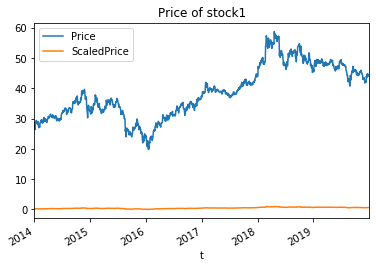

In [6]:
# Remove NA
# stock = stock.loc[stock['VA']!='NA']

# Check NA
stock1.loc[stock1['Price']=='NA']

stock1[['Price','ScaledPrice']].plot(title="Price of stock1")

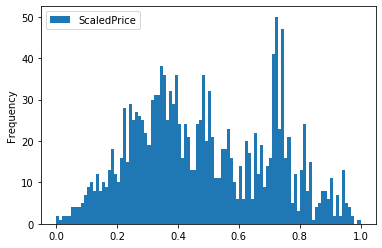

In [7]:
stock1[['ScaledPrice']].plot.hist(bins=100)

# Calculating Volatility

For simplicity, let's assume we have monthly stock closing prices of $1 through $10. For example, month one is $1, month two is $2, and so on. To calculate variance, follow the five steps below.

1. Find the mean of the data set. This means adding each value, and then dividing it by the number of values. This is a mean, or average price, of 5.50.
2. Calculate the difference between each data value and the mean. This is often called deviation. For example, we take 10 - 5.50 = 4.50, then 9 - 5.50 = 3.50. This continues all the way down to the our first data value of 1. Negative numbers are allowed. Since we need each value, these calculation are frequently done in a spreadsheet.  
3. Square the deviations. This will eliminate negative values.  
4. Add the squared deviations together. In our example, this equals 82.5.  
5. Divide the sum of the squared deviations (82.5) by the number of data values.  

In [8]:
df = stock1
# df['5d_rolling_mean'] = stock1.rolling(5).mean()
# df['5d_mean_expanding'] = stock1.expanding(5).mean()
df

,Price,ScaledPrice,Date
t,,,
2014-01-01,28.60,0.225641,2014-01-01
2014-01-02,27.40,0.194872,2014-01-02
2014-01-03,26.80,0.179487,2014-01-03
2014-01-06,26.40,0.169231,2014-01-06
2014-01-07,28.10,0.212821,2014-01-07
...,...,...,...
2019-12-25,44.25,0.626923,2019-12-25
2019-12-26,44.50,0.633333,2019-12-26
2019-12-27,44.25,0.626923,2019-12-27


# Calculate daily return and Price St.Dev. for single series


Use window function

https://pandas.pydata.org/pandas-docs/stable/reference/window.html


See this example how to use apply with lambda function.

https://stackoverflow.com/questions/40954560/pandas-rolling-apply-custom



rolling.Rolling.std gives different value than our custom volatility calculation functions.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.std.html

Using ddof=0 (default degree of freedom is n-1) will get the same values for us and them.


In [9]:
df['ScaledPrice']

t
2014-01-01    0.225641
2014-01-02    0.194872
2014-01-03    0.179487
2014-01-06    0.169231
2014-01-07    0.212821
                ...   
2019-12-25    0.626923
2019-12-26    0.633333
2019-12-27    0.626923
2019-12-30    0.620513
2019-12-31    0.620513
Name: ScaledPrice, Length: 1566, dtype: float64

In [10]:
df['Daily Return'] = np.log(df['ScaledPrice'] / df['ScaledPrice'].shift(1))

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df['price_avg30d'] = df['ScaledPrice'].rolling(window=30).mean()
df['price_avg180d'] = df['ScaledPrice'].rolling(window=180).mean()
df['price_avg300d'] = df['ScaledPrice'].rolling(window=300).mean()

In [12]:
df['mean_5d'] = df['Daily Return'].rolling(window=5).mean()
df

,Price,ScaledPrice,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d
t,,,,,,,,
2014-01-01,28.60,0.225641,2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,27.40,0.194872,2014-01-02,-0.146603,NaN,NaN,NaN,NaN
2014-01-03,26.80,0.179487,2014-01-03,-0.082238,NaN,NaN,NaN,NaN
2014-01-06,26.40,0.169231,2014-01-06,-0.058841,NaN,NaN,NaN,NaN
2014-01-07,28.10,0.212821,2014-01-07,0.229186,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-25,44.25,0.626923,2019-12-25,0.000000,0.605342,0.666346,0.692991,-0.004049
2019-12-26,44.50,0.633333,2019-12-26,0.010173,0.605128,0.665741,0.692564,0.002035
2019-12-27,44.25,0.626923,2019-12-27,-0.010173,0.604701,0.665135,0.692094,-0.002035


In [13]:

df.dropna(inplace=True)
df

,Price,ScaledPrice,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d
t,,,,,,,,
2015-02-24,34.10,0.366667,2015-02-24,0.021202,0.389487,0.374501,0.324667,-1.740228e-02
2015-02-25,33.80,0.358974,2015-02-25,-0.021202,0.390855,0.375114,0.325111,-2.419052e-02
2015-02-26,34.50,0.376923,2015-02-26,0.048790,0.393077,0.375798,0.325718,1.387779e-17
2015-02-27,34.30,0.371795,2015-02-27,-0.013699,0.394872,0.376439,0.326359,-2.739769e-03
2015-03-02,35.00,0.389744,2015-03-02,0.047147,0.396325,0.377137,0.327094,1.644762e-02
...,...,...,...,...,...,...,...,...
2019-12-25,44.25,0.626923,2019-12-25,0.000000,0.605342,0.666346,0.692991,-4.048721e-03
2019-12-26,44.50,0.633333,2019-12-26,0.010173,0.605128,0.665741,0.692564,2.034606e-03
2019-12-27,44.25,0.626923,2019-12-27,-0.010173,0.604701,0.665135,0.692094,-2.034606e-03


In [14]:
# Checking which variable we can access.
# stddev_5d = lambda x: x.mean() + x[0]
# x[5] -> IndexError: index 5 is out of bounds

# Calcualtes price volatility (std.dev.) for 5 day window. 1. Find mean. 2. Find deviation. 3. Squared deviation. 4. Sum squared devations. 5. Divide by number of ovservations. This is variance. 6. Take square root.
stddev_5d = lambda x: np.sqrt((np.square(x[0]-x.mean()) + np.square(x[1]-x.mean()) + np.square(x[2]-x.mean()) + np.square(x[3]-x.mean()) + np.square(x[4]-x.mean())) / 5)

def stddev_ndays(x, n=5):
    """Calcualte standard deviation which is the proxy for volatility.
       Improve for clarity over stddev_5d one-liner. """
    mean = x.mean() # Mean of the window.
    total_squared_deviation = 0.0 # For collecting squared deviation.
    for i in range(n):
        obs = x[i]
        deviation = obs - mean
        sqrd_dev = np.square(deviation)
        total_squared_deviation += sqrd_dev
    return np.sqrt(total_squared_deviation / n) # Take square root of variance and return st.dev. value

df['rolling5d_stddev'] = df['ScaledPrice'].rolling(5).std() # Short cut available from pandas
df['stddev_5d'] = df['ScaledPrice'].rolling(5).apply(stddev_5d)
df['stddev_ndays5'] = df['ScaledPrice'].rolling(5).apply(stddev_ndays, (5,)) # Manual window function
df['stddev_ndays10'] = df['ScaledPrice'].rolling(10).apply(stddev_ndays, (10,)) # Manual window function
df['stddev_ndays15'] = df['ScaledPrice'].rolling(15).apply(stddev_ndays, (15,)) # Manual window function
df['stddev_ndays30'] = df['ScaledPrice'].rolling(30).apply(stddev_ndays, (30,)) # Manual window function

df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


,Price,ScaledPrice,Date,Daily Return,price_avg30d,price_avg180d,price_avg300d,mean_5d,rolling5d_stddev,stddev_5d,stddev_ndays5,stddev_ndays10,stddev_ndays15,stddev_ndays30
t,,,,,,,,,,,,,,
2015-02-24,34.10,0.366667,2015-02-24,0.021202,0.389487,0.374501,0.324667,-1.740228e-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-25,33.80,0.358974,2015-02-25,-0.021202,0.390855,0.375114,0.325111,-2.419052e-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-26,34.50,0.376923,2015-02-26,0.048790,0.393077,0.375798,0.325718,1.387779e-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-27,34.30,0.371795,2015-02-27,-0.013699,0.394872,0.376439,0.326359,-2.739769e-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-02,35.00,0.389744,2015-03-02,0.047147,0.396325,0.377137,0.327094,1.644762e-02,0.011553,0.010333,0.010333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,44.25,0.626923,2019-12-25,0.000000,0.605342,0.666346,0.692991,-4.048721e-03,0.005734,0.005128,0.005128,0.018678,0.033055,0.025834
2019-12-26,44.50,0.633333,2019-12-26,0.010173,0.605128,0.665741,0.692564,2.034606e-03,0.005363,0.004797,0.004797,0.012163,0.034902,0.020949
2019-12-27,44.25,0.626923,2019-12-27,-0.010173,0.604701,0.665135,0.692094,-2.034606e-03,0.005734,0.005128,0.005128,0.012314,0.033320,0.014340


# Cross-section analysis of SET stocks for year 2019

In [15]:
volatility = {}

for k in series.keys():
    # print(k)
    try:
        stock = get_price_series(k, series)
        
        # Price average
        stock['price_avg30d'] = stock['ScaledPrice'].rolling(window=30).mean()
        stock['price_avg180d'] = stock['ScaledPrice'].rolling(window=180).mean()
        stock['price_avg300d'] = stock['ScaledPrice'].rolling(window=300).mean()
        # Calculate volatility
        stock['stddev_ndays5'] = stock['ScaledPrice'].rolling(5).apply(stddev_ndays, (5,))
        stock['stddev_ndays10'] = stock['ScaledPrice'].rolling(10).apply(stddev_ndays, (10,))
        stock['stddev_ndays15'] = stock['ScaledPrice'].rolling(15).apply(stddev_ndays, (15,))
        stock['stddev_ndays30'] = stock['ScaledPrice'].rolling(30).apply(stddev_ndays, (30,))
        
        # Cut period with data
        volatility[k] = stock['2019-01-01':'2019-12-31']
    except Exception as e:
        print("Error calculating volatility for %s: %s" % (k, e))

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; r

In [16]:
len(volatility) # Volatility data for year 2019. 

600

In [17]:
# Checkpoint. Save 2019 volatility calculation data to disk.

# volatility

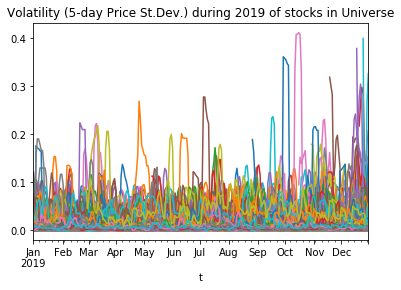

In [19]:
for k, s in volatility.items():
    s['stddev_ndays5'].plot(title="Volatility (5-day Price St.Dev.) during 2019 of stocks in Universe")
plt.savefig("2019_stddev_ndays5.png")

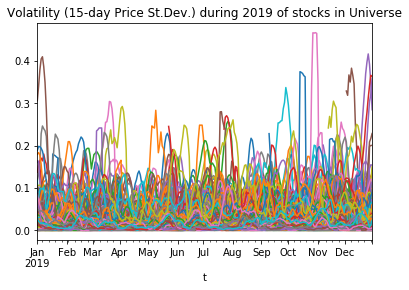

In [20]:
for k, s in volatility.items():
    s['stddev_ndays15'].plot(title="Volatility (15-day Price St.Dev.) during 2019 of stocks in Universe")
plt.savefig("2019_stddev_ndays15.png")

In [25]:
crossection = []

for k, s in volatility.items():
    s['mean_vol'] = s['stddev_ndays5'].mean()
    item = {'ticker': k, 
            'mean_volatility': s['stddev_ndays5'].mean(), 
            'mean_vol5d': s['stddev_ndays5'].mean(), 
            'mean_vol10d': s['stddev_ndays10'].mean(), 
            'mean_vol15d': s['stddev_ndays15'].mean(), 
            'mean_vol30d': s['stddev_ndays30'].mean(), 
            'mean_price': s['ScaledPrice'].mean(),
            'volatility_5d': s['2019-01-01':'2019-12-31']['stddev_ndays5'].values[0]}
    crossection.append(item)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
crossection = pd.DataFrame(crossection)
crossection[['ticker','volatility_5d','mean_price','mean_vol5d','mean_vol10d','mean_vol15d','mean_vol30d']]

,ticker,volatility_5d,mean_price,mean_vol5d,mean_vol10d,mean_vol15d,mean_vol30d
0,7UP,0.000818,0.037311,0.002365,0.003560,0.004931,0.008543
1,A,0.011173,0.749460,0.012355,0.015025,0.017483,0.023828
2,AAV,0.004558,0.263574,0.007719,0.011614,0.016400,0.029252
3,ABPIF,0.011268,0.144353,0.012952,0.019711,0.026488,0.059947
4,ACC,0.005764,0.257742,0.015653,0.020211,0.024220,0.030720
...,...,...,...,...,...,...,...
595,WORK,0.001617,0.096761,0.005270,0.008023,0.011321,0.020287
596,WP,0.001084,0.091419,0.010911,0.016895,0.023829,0.044028
597,WPH,0.005406,0.184236,0.008589,0.013337,0.018835,0.032856
598,ZEN,NaN,0.387313,0.045442,0.066078,0.084660,0.131993


Text(0.5, 1.0, '2019 Avg Price vs 5-day Price St.Dev. of 600 securities')

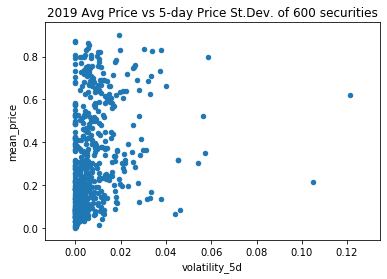

In [29]:
# crossection[['ticker','volatility_5d','mean_price']].to_csv('volatility2019_crossection.csv')

# plot 1: 

ax = crossection[['ticker','volatility_5d','mean_price']].plot.scatter(x='volatility_5d', y='mean_price')
plt.title('2019 Avg Price vs 5-day Price St.Dev. of 600 securities')


Text(0.5, 1.0, '2019 Avg Price vs 5-day Price St.Dev. of 600 securities')

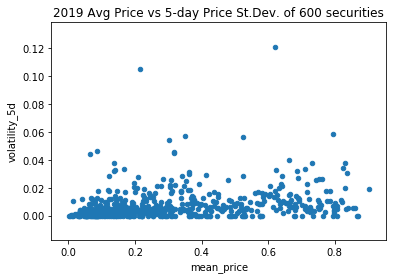

In [30]:
# plot 2: 

ax = crossection[['ticker','volatility_5d','mean_price']].plot.scatter(x='mean_price', y='volatility_5d')
plt.title('2019 Avg Price vs 5-day Price St.Dev. of 600 securities')


In [31]:
df3 = crossection[['ticker','volatility_5d','mean_price']]
df3['vol2prc'] = df3['volatility_5d'] / df3['mean_price'] 
df3.tail()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,volatility_5d,mean_price,vol2prc
595,WORK,0.001617,0.096761,0.016709
596,WP,0.001084,0.091419,0.011858
597,WPH,0.005406,0.184236,0.029341
598,ZEN,NaN,0.387313,NaN
599,ZMICO,0.007339,0.261872,0.028027


Text(0, 0.5, 'number of stocks')

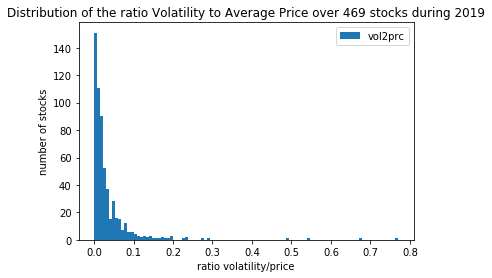

In [32]:
ax = df3[['vol2prc']].plot.hist(bins=100)
plt.title('Distribution of the ratio Volatility to Average Price over 469 stocks during 2019')
plt.xlabel('ratio volatility/price')
plt.ylabel('number of stocks')

# Outlier from point of view of Volatility


This example use scipy to determine z-score and remove record with score greater than 3.
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


,count,mean,std,min,25%,50%,75%,max
volatility_5d,582.0,0.007692,0.011115,0.000000,0.001327,0.004451,0.010029,0.121119
mean_price,600.0,0.316949,0.232708,0.001677,0.121882,0.254764,0.484280,0.902540


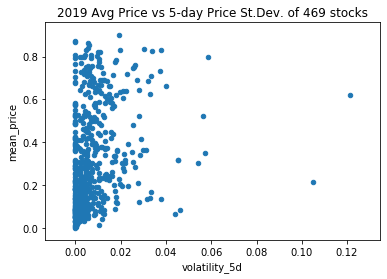

In [33]:
ax = crossection[['ticker','volatility_5d','mean_price']].plot.scatter(x='volatility_5d', y='mean_price')
plt.title('2019 Avg Price vs 5-day Price St.Dev. of 469 stocks')


df_normvol = crossection[['ticker','volatility_5d','mean_price']]
df_normvol.describe().T

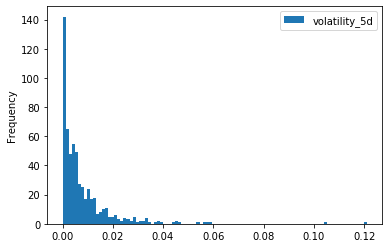

In [34]:
df_normvol[['volatility_5d']].plot.hist(bins=100)

In [35]:
stat = df_normvol[['volatility_5d']].describe().T
mean = stat['mean'].values[0]
stdev = stat['std'].values[0]
print("Mean=%s Std.Dev=%s" % (mean, stdev))

# 2x st.dev
stdevx2 = stdev * 2

# 3x st.dev
stdevx3 = stdev * 3

# upper threshold
outlier_uth = mean + stdevx3

# lower threshold
outlier_lth = mean - stdevx2

outlier_lth, outlier_uth

Mean=0.007692433596435036 Std.Dev=0.011114538772955141


(-0.014536643949475247, 0.041036049915300465)

In [36]:
sd1 = mean - stdev
sd1

-0.003422105176520105

In [37]:
# volatility outliers: greather than 3 st.dev from mean

outlier1 = df_normvol.loc[df_normvol['volatility_5d'] >= outlier_uth]
outlier1

,ticker,volatility_5d,mean_price
205,ICC,0.058608,0.795826
267,MII,0.105030,0.213780
309,NEP,0.044036,0.065134
321,NVD,0.046311,0.085316
348,PORT,0.045221,0.318270
382,RJH,0.056256,0.523548
385,ROH,0.121119,0.619568
394,SABINA,0.045501,0.317296
545,TSI,0.054264,0.301563
585,WACOAL,0.057368,0.351364


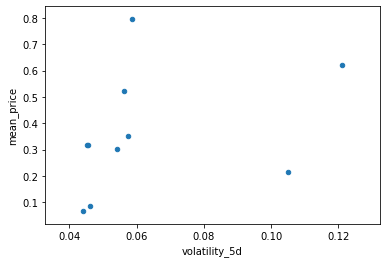

In [38]:
ax = outlier1[['volatility_5d','mean_price']].plot.scatter(x='volatility_5d',y='mean_price')



# Scatter plot with labels on data point
# see
# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

,ticker,volatility_5d,mean_price
58,BCH,0.033240,0.710937
62,BDMS,0.037864,0.830904
144,DTCI,0.029986,0.362200
163,FE,0.039847,0.661543
205,ICC,0.058608,0.795826
246,KTIS,0.037640,0.137532
267,MII,0.105030,0.213780
293,MIT,0.032890,0.140040
309,NEP,0.044036,0.065134
321,NVD,0.046311,0.085316


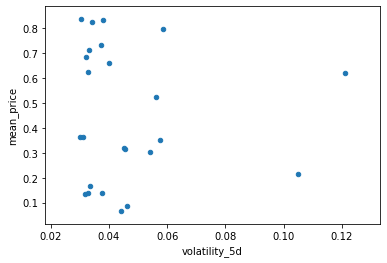

In [39]:
# volatility outliers: greather than 2 st.dev from mean

outlier2 = df_normvol.loc[df_normvol['volatility_5d'] >= mean + stdevx2]

outlier2[['volatility_5d','mean_price']].plot.scatter(x='volatility_5d',y='mean_price')
outlier2

In [40]:
# volatility outliers: greather than 1 st.dev from mean

outlier3 = df_normvol.loc[df_normvol['volatility_5d'] >= mean + stdev]

# Group by Sector/Industry

In [51]:
import os.path
datapath = os.path.join('..', """1.2 Identify sources and collect data""", 'stock_ticker.csv')
stockinfolookup = pd.read_csv(datapath)
stockinfolookup.tail(3)

,Unnamed: 0,symbol,exchange,industry,sector,name
804,ZEN,ZEN,SET,Agro & Food Industry,Food & Beverage,ZEN CORPORATION GROUP PUBLIC COMPANY LIMITED
805,ZIGA,ZIGA,MAI,Industrial,-,ZIGA INNOVATION PUBLIC COMPANY LIMITED
806,ZMICO,ZMICO,SET,Financials,Finance & Securities,SEAMICO SECURITIES PUBLIC COMPANY LIMITED


In [52]:
def get_sector(r):
    try:
        return stockinfolookup.loc[stockinfolookup['symbol']==r].sector.values[0]
    except:
        print("Error getting sector for %s. Lookup failed." % (r,))
    return "ERROR"

def get_industry(r):
    try:
        return stockinfolookup.loc[stockinfolookup['symbol']==r].industry.values[0]
    except:
        print("Error getting industry for %s" % r)
    return "ERROR"

# df3['sector'] = stockinfolookup.loc[stockinfolookup['symbol']==df3['ticker'].values[0]].sector.values[0]
# df3['industry'] = stockinfolookup.loc[stockinfolookup['symbol']==df3['ticker'].values[0]].industry.values[0]

# df3.apply(get_industrysector)
df3['sector'] = df3['ticker'].apply(get_sector)
df3['industry'] = df3['ticker'].apply(get_industry)

Error getting sector for BWORK. Lookup failed.
Error getting sector for BAT3K. Lookup failed.
Error getting sector for GEN. Lookup failed.
Error getting sector for GOLD. Lookup failed.
Error getting sector for MCHAI. Lookup failed.
Error getting sector for MII. Lookup failed.
Error getting sector for MPAT. Lookup failed.
Error getting sector for MSTOR. Lookup failed.
Error getting sector for QCON. Lookup failed.
Error getting sector for S&J. Lookup failed.
Error getting sector for SEED. Lookup failed.
Error getting sector for TUPF. Lookup failed.
Error getting sector for WG. Lookup failed.
Error getting industry for BWORK
Error getting industry for BAT3K
Error getting industry for GEN
Error getting industry for GOLD


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Error getting industry for MCHAI
Error getting industry for MII
Error getting industry for MPAT
Error getting industry for MSTOR
Error getting industry for QCON
Error getting industry for S&J
Error getting industry for SEED
Error getting industry for TUPF
Error getting industry for WG


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
# stockinfolookup.loc[stockinfolookup['symbol']=='BBL']

In [56]:
df3[['ticker','industry','volatility_5d']]

,ticker,industry,volatility_5d
0,7UP,Resources,0.000818
1,A,Property & Construction,0.011173
2,AAV,Services,0.004558
3,ABPIF,Resources,0.011268
4,ACC,Consumer Products,0.005764
...,...,...,...
595,WORK,Services,0.001617
596,WP,Resources,0.001084
597,WPH,Services,0.005406
598,ZEN,Agro & Food Industry,NaN


In [57]:
!pip install fonttools

In [58]:
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from fontTools.ttLib import TTFont

df3[['industry','sector','volatility_5d']]

,industry,sector,volatility_5d
0,Resources,Energy & Utilities,0.000818
1,Property & Construction,Property Development,0.011173
2,Services,Transportation & Logistics,0.004558
3,Resources,Energy & Utilities,0.011268
4,Consumer Products,Home & Office Products,0.005764
...,...,...,...
595,Services,Media & Publishing,0.001617
596,Resources,Energy & Utilities,0.001084
597,Services,Health Care Services,0.005406
598,Agro & Food Industry,Food & Beverage,NaN


In [ ]:

ax = df3[['industry','sector','volatility_5d']].boxplot(by=['industry'], figsize=(20,8),rot=30)
plt.ylabel('Volatility')

In [ ]:

ax = df3[['industry','sector','volatility_5d']].boxplot(by=['sector'], figsize=(20,8),rot=30)
plt.ylabel('Volatility')

In [ ]:
# Checkpoint

df3[['ticker','industry','sector','volatility_5d','mean_price']].to_csv('volatility2019.csv')